## Machine learning with one hot encoder in logit side

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns


In [2]:
df_raw = pd.read_csv('kredit.csv')

In [3]:
# For safety reason, copy the raw file into another variable

dataset = df_raw.copy(deep = True)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   kredit    1000 non-null   int64
 1   laufkont  1000 non-null   int64
 2   laufzeit  1000 non-null   int64
 3   moral     1000 non-null   int64
 4   verw      1000 non-null   int64
 5   hoehe     1000 non-null   int64
 6   sparkont  1000 non-null   int64
 7   beszeit   1000 non-null   int64
 8   rate      1000 non-null   int64
 9   famges    1000 non-null   int64
 10  buerge    1000 non-null   int64
 11  wohnzeit  1000 non-null   int64
 12  verm      1000 non-null   int64
 13  alter     1000 non-null   int64
 14  weitkred  1000 non-null   int64
 15  wohn      1000 non-null   int64
 16  bishkred  1000 non-null   int64
 17  beruf     1000 non-null   int64
 18  pers      1000 non-null   int64
 19  telef     1000 non-null   int64
 20  gastarb   1000 non-null   int64
dtypes: int64(21)
memory usage: 164.2 KB


In [5]:
def summary_df(df):

  columns = df.columns.to_list()

  dtypes = []
  unique_counts = []
  missing_counts = []
  missing_percentages = []
  total_counts = [df.shape[0]] * len(columns)

  for column in columns:
      dtype = str(df[column].dtype)
      dtypes.append(dtype)
        
      unique_count = df[column].nunique()
      unique_counts.append(unique_count)

      missing_count = df[column].isnull().sum()
      missing_counts.append(missing_count)
        
      missing_percentage = round((missing_count/df.shape[0]) * 100, 2)
      missing_percentages.append(missing_percentage)
        


  df_summary = pd.DataFrame({
      "column": columns,
      "dtype": dtypes,
      "unique_count": unique_counts,
      "missing_count": missing_counts,
      "missing_percentage": missing_percentages,
      "total_count": total_counts,
  })
    
  df_summary = df_summary.sort_values(by="missing_percentage", ascending=False).reset_index(drop=True)
    
  return df_summary

In [6]:
summary_df(dataset)

,column,dtype,unique_count,missing_count,missing_percentage,total_count
0,kredit,int64,2,0,0.0,1000
1,wohnzeit,int64,4,0,0.0,1000
2,telef,int64,2,0,0.0,1000
3,pers,int64,2,0,0.0,1000
4,beruf,int64,4,0,0.0,1000
5,bishkred,int64,4,0,0.0,1000
6,wohn,int64,3,0,0.0,1000
7,weitkred,int64,3,0,0.0,1000
8,alter,int64,53,0,0.0,1000
9,verm,int64,4,0,0.0,1000


In [7]:
dataset['laufzeit']

0      18
1       9
2      12
3      12
4      12
       ..
995    24
996    24
997    21
998    12
999    30
Name: laufzeit, Length: 1000, dtype: int64

### Features Engineering

##### distinct categorical data without  rank system or order . In this case we can see from above alter, hoehe, and laufzeit are continous value. Other datas are categorical value and label encoded. Machine learning will take this as a problem while modeling. To avoid this we can use one hot encoded to the columns.

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [9]:
dataset.columns

Index(['kredit', 'laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb'],
      dtype='object')

In [10]:
categorical_columns = ['laufkont', 'moral', 'verw', 'sparkont',
       'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm',
       'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb']

X_cat = dataset[categorical_columns]
X_num = dataset[['laufzeit', 'hoehe','alter']].values

In [11]:
ohe = OneHotEncoder()
ohe.fit(X_cat)

OneHotEncoder(categories='auto', drop=None, dtype=<class 'numpy.float64'>,
              handle_unknown='error', sparse=True)

In [12]:
X_cat = ohe.transform(X_cat).toarray()

In [13]:
X_cat.shape, X_num.shape

((1000, 68), (1000, 3))

In [14]:
X = np.hstack((X_cat, X_num))

In [15]:
X.shape

(1000, 71)

### Modeling

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
target = 'kredit'

In [18]:
y = dataset[target]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
X_train.shape, X_test.shape

((800, 71), (200, 71))

In [21]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

clf = LogisticRegression()

In [22]:
clf.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
y_predict_test_proba = clf.predict_proba(X_test)[:, 1]
y_predict_test_class = clf.predict(X_test)
y_predict_train_proba = clf.predict_proba(X_train)[:, 1]
y_predict_train_class = clf.predict(X_train)

In [24]:
print(roc_auc_score(y_test, y_predict_test_proba))
print(accuracy_score(y_test, y_predict_test_class))
print(f1_score(y_test, y_predict_test_class))

0.8307142857142858
0.785
0.8501742160278746


In [25]:
print(roc_auc_score(y_train, y_predict_train_proba))
print(accuracy_score(y_train, y_predict_train_class))
print(f1_score(y_train, y_predict_train_class))

0.8198139880952382
0.78375
0.8527659574468085


### Hyperparameter tuning

In [26]:
from sklearn.model_selection import GridSearchCV

param_test = {'C': np.linspace(0.1, 5.0),
              'solver': ['newton-cg', 'lbfgs', 'sag', 'saga']}

clf = LogisticRegression(n_jobs=-1)

grid_search = GridSearchCV(
    estimator = clf,
    param_grid = param_test,
    scoring = 'roc_auc',
    verbose = 1,
    cv = 3,
    n_jobs=-1
)

In [27]:
grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 3 folds for each of 200 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    9.1s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ]),
                         'solver': ['newton-cg

In [28]:
grid_search.best_score_, grid_search.best_params_

(0.7671542272823108, {'C': 1.0, 'solver': 'lbfgs'})

In [29]:
#clf_grid = LGBMClassifier(
 #   **grid_search.best_params_
#)
clf_grid = LogisticRegression(
    **grid_search.best_params_
)

In [30]:
clf_grid.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_predict_test_proba = clf_grid.predict_proba(X_test)[:, 1]
y_predict_test_class = clf_grid.predict(X_test)
y_predict_train_proba = clf_grid.predict_proba(X_train)[:, 1]
y_predict_train_class = clf_grid.predict(X_train)

In [32]:
print(roc_auc_score(y_test, y_predict_test_proba))
print(accuracy_score(y_test, y_predict_test_class))
print(f1_score(y_test, y_predict_test_class))

0.8307142857142858
0.785
0.8501742160278746


In [33]:
print(roc_auc_score(y_train, y_predict_train_proba))
print(accuracy_score(y_train, y_predict_train_class))
print(f1_score(y_train, y_predict_train_class))

0.8198139880952382
0.78375
0.8527659574468085


### Inference

###### probe

In [34]:
def to_labels(pos_probs, threshold):
	return (pos_probs >= threshold).astype('int')

thresholds = np.arange(0, 1, 0.001)

scores = [f1_score(y_test, to_labels(y_predict_test_proba, t)) for t in thresholds]

ix = np.argmax(scores)

print('Threshold=%.3f, F-Score=%.5f' % (thresholds[ix], scores[ix]))

Threshold=0.297, F-Score=0.86250


In [35]:
tmp = pd.DataFrame({
    'laufkont':[1],'laufzeit':[12], 'moral':[1], 'verw':[0], 'hoehe':[3272],'sparkont':[1],
       'beszeit':[3], 'rate':[1], 'famges':[2], 'buerge':[1], 'wohnzeit':[4], 'verm':[3],
       'alter':[30],'weitkred':[3], 'wohn':[2], 'bishkred':[1], 'beruf':[3], 'pers':[1], 'telef':[1], 'gastarb':[1]
})

In [36]:
X_inference = tmp[categorical_columns]

In [37]:
X_inference.shape

(1, 17)

In [38]:
X_inference = ohe.transform(X_inference).toarray()

In [39]:
X

array([[1.000e+00, 0.000e+00, 0.000e+00, ..., 1.800e+01, 1.049e+03,
        2.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 9.000e+00, 2.799e+03,
        3.600e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.200e+01, 8.410e+02,
        2.300e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 2.100e+01, 1.268e+04,
        3.000e+01],
       [0.000e+00, 1.000e+00, 0.000e+00, ..., 1.200e+01, 6.468e+03,
        5.200e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, ..., 3.000e+01, 6.350e+03,
        3.100e+01]])

In [40]:
X_inference = np.hstack((X_inference, tmp[['laufzeit', 'hoehe','alter']].values))

In [41]:
X_inference

array([[1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.200e+01, 3.272e+03, 3.000e+01]])

In [42]:
X_inference.shape

(1, 71)

In [43]:
(clf_grid.predict_proba(X_inference)[:, 1] > .297).astype('int')

array([1])

In [44]:
pd.dtype()


AttributeError: module 'pandas' has no attribute 'dtype'

In [ ]:
dataset.info()

In [ ]:
dataset.isnull().sum()

In [ ]:
df.info()

In [ ]:
dataset.replace("-",np.nan)

In [45]:
def plot_cm(cm):
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax, fmt='d'); #annot=True to annotate cells
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['bad', 'good']); ax.yaxis.set_ticklabels(['bad', 'good']);

In [49]:
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report, recall_score, precision_score

clf_lr = LogisticRegression()
clf_lgbm = LGBMClassifier()

In [51]:
clf_lr.fit(X_train, y_train)
clf_lgbm.fit(X_train, y_train)

E:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [53]:
y_pred_prob_lr = clf_lr.predict_proba(X_test)[:, 1]
print(f'LogReg AUC: {roc_auc_score(y_test, y_pred_prob_lr)}')
y_pred_prob_lgbm = clf_lgbm.predict_proba(X_test)[:, 1]
print(f'LGBM AUC: {roc_auc_score(y_test, y_pred_prob_lgbm)}')

LogReg AUC: 0.8307142857142858
LGBM AUC: 0.7867857142857144


In [54]:
y_pred_lr = clf_lr.predict(X_test)
print(f'LogReg F1: {f1_score(y_test, y_pred_lr)}')
y_pred_lgbm = clf_lgbm.predict(X_test)
print(f'LGBM F1: {f1_score(y_test, y_pred_lgbm)}')

LogReg F1: 0.8501742160278746
LGBM F1: 0.8292682926829269


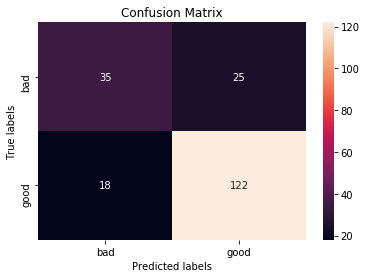

In [55]:
confmat_lr = confusion_matrix(y_test, y_pred_lr)
plot_cm(confmat_lr)

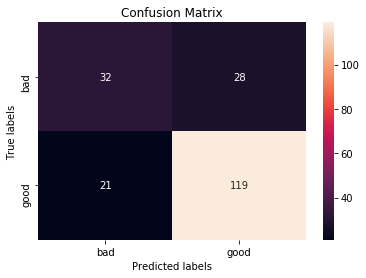

In [56]:
confmat_lgbm = confusion_matrix(y_test, y_pred_lgbm)
plot_cm(confmat_lgbm)

In [57]:
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.66      0.58      0.62        60
           1       0.83      0.87      0.85       140

    accuracy                           0.79       200
   macro avg       0.75      0.73      0.73       200
weighted avg       0.78      0.79      0.78       200



In [58]:
print(classification_report(y_test, y_pred_lgbm))

              precision    recall  f1-score   support

           0       0.60      0.53      0.57        60
           1       0.81      0.85      0.83       140

    accuracy                           0.76       200
   macro avg       0.71      0.69      0.70       200
weighted avg       0.75      0.76      0.75       200



In [59]:
recall_score(y_test, y_pred_lr), recall_score(y_test, y_pred_lgbm)

(0.8714285714285714, 0.85)

In [60]:
precision_score(y_test, y_pred_lr), precision_score(y_test, y_pred_lgbm)

(0.8299319727891157, 0.8095238095238095)